## Part 1 - EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_json('logins.json')

What type is our column

In [4]:
df.dtypes

login_time    datetime64[ns]
dtype: object

Top 5 entries in DF

In [5]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Aggregate the login based on 15 min time intervals

In [6]:
df.set_index('login_time', inplace=True)

In [7]:
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [8]:
df['count'] = 1

#### 15 min time intervals

In [9]:
df = df.resample('15T').agg({'count':'sum'})

In [10]:
df.index = pd.to_datetime(df.index)
df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [26]:
d = pd.Series(df.index)


In [27]:
import math

def week(df):
    df['week'] = pd.to_numeric(df.index.day/7)
    df['week'] = df['week'].apply(lambda x: math.ceil(x))
    return df

In [28]:
df['month'] = d.dt.month.values
week(df)
df['day_of_week']  = d.dt.dayofweek.values

In [29]:
df['time'] = d.dt.time.values

In [30]:
df.head()

,count,month,week,day_of_week,time
login_time,,,,,
1970-01-01 20:00:00,2,1,1,3,20:00:00
1970-01-01 20:15:00,6,1,1,3,20:15:00
1970-01-01 20:30:00,9,1,1,3,20:30:00
1970-01-01 20:45:00,7,1,1,3,20:45:00
1970-01-01 21:00:00,1,1,1,3,21:00:00


In [15]:
df.tail()

,count,month,week,day_of_week
login_time,,,,
1970-04-13 17:45:00,5,4,2,0
1970-04-13 18:00:00,5,4,2,0
1970-04-13 18:15:00,2,4,2,0
1970-04-13 18:30:00,7,4,2,0
1970-04-13 18:45:00,6,4,2,0


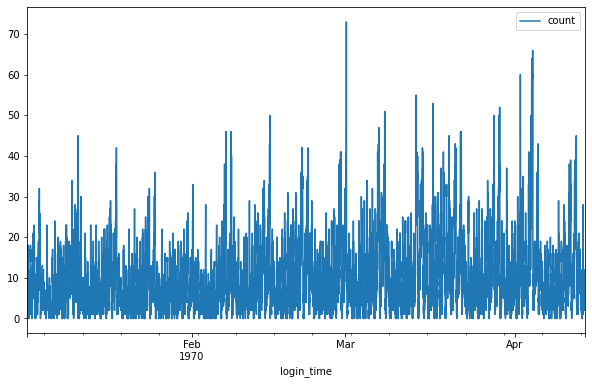

In [16]:
df.drop(['week','month', 'day_of_week'], axis=1).plot(figsize=(10, 6))
plt.show()

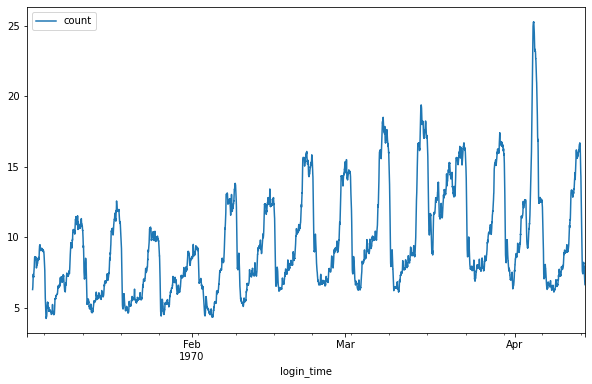

In [17]:
df.drop(['week','month', 'day_of_week'], axis=1).rolling(window=100).mean().plot(figsize=(10,6))
plt.show()

In [18]:
df.groupby('month').sum('count')

,count,week,day_of_week
month,,,
1,21239,8080,8976
2,24673,6720,8064
3,33723,8160,8736
4,13507,1784,3936


We can see the most logins occured during the 3rd Month, but we cannot conclude the logins for the 4th month since we only have data of about two weeks. But if we want to look at the data by only the first two weeks we can do that.

In [19]:
df[df.week <=2].groupby('month').sum('count')
# This shows on average with the first weeks of every month 
# they have about the same amount of logins except the first month which roughly 200 login short

,count,week,day_of_week
month,,,
1,9166,1936,3792
2,11215,2016,4032
3,14444,2016,4032
4,13507,1784,3936


Let's look at which week did we see the most logins between the 4 months

In [20]:
df.groupby(['month','week']).sum('count').drop('day_of_week', axis=1).transpose()

month     1                             2                       3              \
week      1     2     3     4     5     1     2     3     4     1     2     3   
count  4017  5149  4971  4912  2190  5180  6035  6747  6711  7237  7207  9048   

month                 4        
week      4     5     1     2  
count  7234  2997  7826  5681

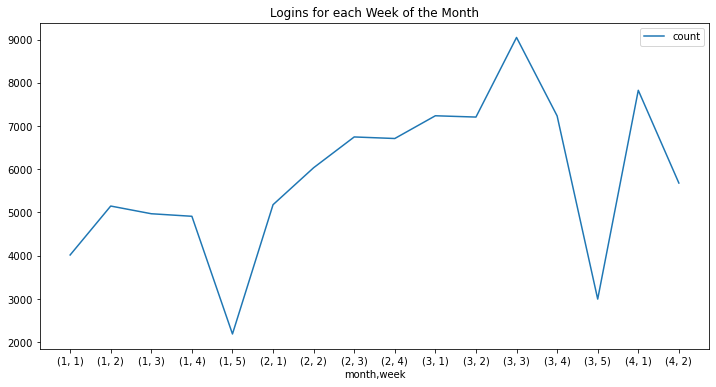

In [21]:
p = df.groupby(['month','week']).sum('count').drop('day_of_week', axis=1)
ax = p.plot(figsize=(12,6))
ax.set_title('Logins for each Week of the Month')
ax.set_xticks(range(len(p)));
ax.set_xticklabels(["(%s,%2d)" % item for item in p.index.tolist()]);

Month 3 week 3 had the most amount of logins, and notice how the most logins occur during the 3rd week of month 2, 3 and in case of  month  4 we lack the data for rest of the month, and on month 1 week 3 it barely loses to week 2. 

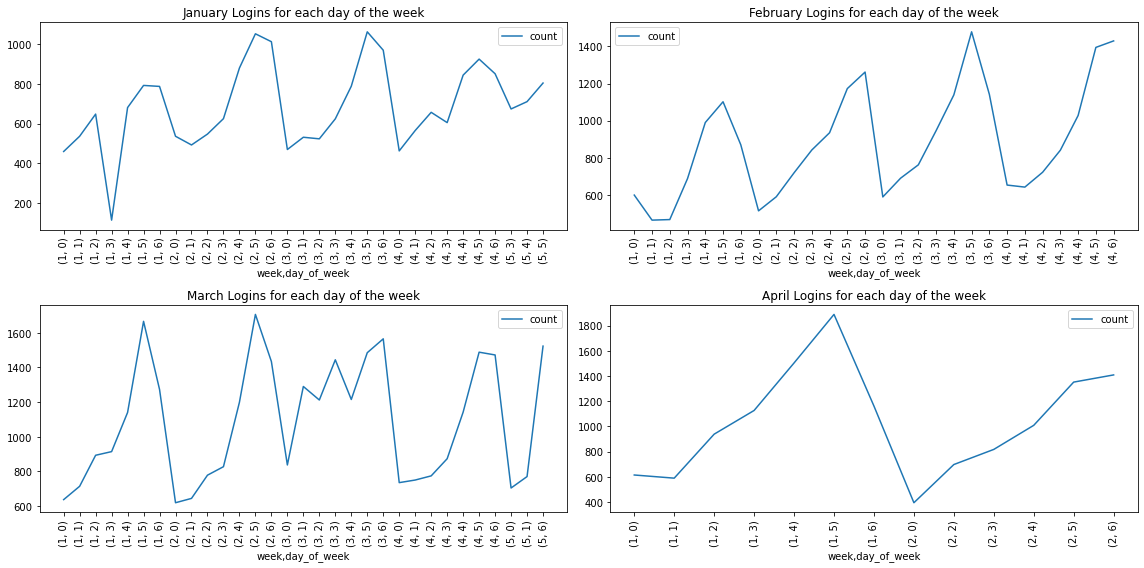

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16,8),nrows=2, ncols=2)
a = df[(df.month == 1) ].groupby(['week','day_of_week']).sum('count').drop(['month'], axis=1)
a.plot( ax=ax1)
ax1.set_title('January Logins for each day of the week')
ax1.set_xticks(range(len(a)));
ax1.set_xticklabels(["(%s,%2d)" % item for item in a.index.tolist()], rotation=90);

b = df[(df.month == 2) ].groupby(['week','day_of_week']).sum('count').drop(['month'], axis=1)
b.plot( ax=ax2)
ax2.set_title('February Logins for each day of the week')
ax2.set_xticks(range(len(b)));
ax2.set_xticklabels(["(%s,%2d)" % item for item in b.index.tolist()], rotation=90);

c = df[(df.month == 3) ].groupby(['week','day_of_week']).sum('count').drop(['month'], axis=1)
c.plot( ax=ax3)
ax3.set_title('March Logins for each day of the week')
ax3.set_xticks(range(len(c)));
ax3.set_xticklabels(["(%s,%2d)" % item for item in c.index.tolist()], rotation=90);

d = df[(df.month == 4) ].groupby(['week','day_of_week']).sum('count').drop(['month'], axis=1)
d.plot( ax=ax4)
ax4.set_title('April Logins for each day of the week')
ax4.set_xticks(range(len(d)));
ax4.set_xticklabels(["(%s,%2d)" % item for item in d.index.tolist()], rotation=90);
fig.tight_layout()

We can see there is an increase of number of logins/demand during the weekends or specifically days 4,5,6.

Let's look at the data as it relates to time of the day, we will plot the hourly average for each month for demand

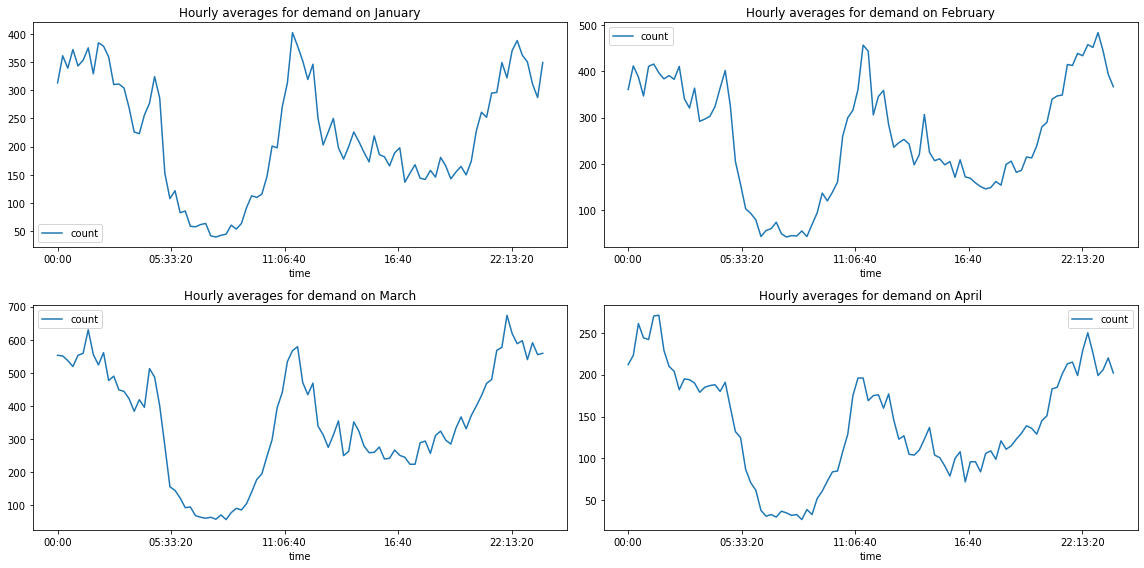

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16,8),nrows=2, ncols=2)

a = df.loc['1970-01'].groupby('time').sum('count').drop(['week','month', 'day_of_week'], axis=1)
a.plot( ax=ax1)
ax1.set_title('Hourly averages for demand on January')


b = df.loc['1970-02'].groupby('time').sum('count').drop(['week','month', 'day_of_week'], axis=1)
b.plot( ax=ax2)
ax2.set_title('Hourly averages for demand on February')


c = df.loc['1970-03'].groupby('time').sum('count').drop(['week','month', 'day_of_week'], axis=1)
c.plot( ax=ax3)
ax3.set_title('Hourly averages for demand on March')


d = df.loc['1970-04'].groupby('time').sum('count').drop(['week','month', 'day_of_week'], axis=1)
d.plot( ax=ax4)
ax4.set_title('Hourly averages for demand on April')

fig.tight_layout()

As the day starts we can see demand picks up around noon and drops through out the evening as it comes close to midnight the demand increases through early morning till 5:30am then it see a sharp drop off. 

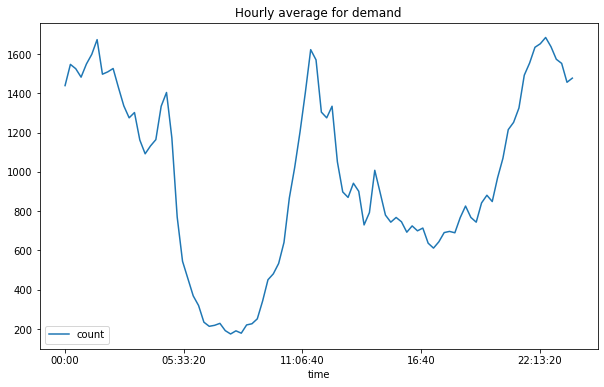

In [37]:
#This is for all 4 months and we can see it is almost identical to the other 4 graphs, as expected
df.loc['1970'].groupby('time').sum('count').drop(['week','month', 'day_of_week'], axis=1).plot(figsize=(10,6))
plt.title('Hourly average for demand')
plt.show()

In [24]:
pd.options.display.max_rows = 100
df.loc['1970-03-05']


,count,month,week,day_of_week
login_time,,,,
1970-03-05 00:00:00,16,3,1,3
1970-03-05 00:15:00,12,3,1,3
1970-03-05 00:30:00,17,3,1,3
1970-03-05 00:45:00,12,3,1,3
1970-03-05 01:00:00,20,3,1,3
1970-03-05 01:15:00,15,3,1,3
1970-03-05 01:30:00,14,3,1,3
1970-03-05 01:45:00,14,3,1,3
1970-03-05 02:00:00,4,3,1,3


In [38]:
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\ProgramData\Anaconda3\lib\site-packages\pandas\_config\config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\_config\config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


Part 1 Conclusion - Demand is greatest around weekend's of each month, with demand being elevated around noon and easing off through evening and peaking around midnight and staying elevated till 5-5:30am then seeing a sharp drop off. 

## Part 2 - Experiments and metric design

### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A key measure of sucess can be seen by the activity level throughout both cities especially during their off-peak hours, since they are complementary where Gotham is active at night and Metropolis is active at day, if both cities see a spike on their off-peak hours, for Gotham that would be during the day, and Metropolis during the night, this can be used as a key measure for success. While one can see the reimbursement data to see if drivers are taking the bridge between the two cities, I don't believe that data shows true correlation of availibility to both cities, as drivers could easily utilize the bridges to drop off one customer for additional fare but return to their own city, thus I believe the activity level is a better indicator.

### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

A practical experiment that could suffice is implementing the proposed change on certain weeks, and seeing if our key measure of success changes from the different weeks where toll fares are reimbursed versus weeks where it isn't. If the data shows there are more activity level during off-peak hours at both cities during weeks where Ultima technology offers toll reimbursement, versus week it isn't. 

### a) how you will implement the experiment

As stated above, we can simply track the activity level of both cities through the day and compare their off-peak hours, to see if there was any change, and if it was significant enough. To do so we would alternate or choose random weeks where tolls would be reimbursed and the other weeks keep everything standard.

### b) what statistical test(s) you will conduct to verify the significance of the observation


In [ ]:
According to the data we can see an average of 

### c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.